<a href="https://colab.research.google.com/github/manifoldailearning/Deep-Learning-2020/blob/master/Class_8_Text_Classification_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checkout the Video at : https://youtu.be/9wrgq6bq_kc

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

In [ ]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [ ]:
train_labels.shape

(25000,)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
train_labels[1]

0

## Word Index

In [ ]:
word_index = imdb.get_word_index()
word_index

In [ ]:
len(word_index)

88584

In [ ]:
train_data[0]

### Text Transformation

In [ ]:
def oh_representations(sequences,dim = 10000):
  results = np.zeros((len(sequences),dim))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [ ]:
def oh_representations_test(sequences,dim = 8):
  results = np.zeros((len(sequences),dim))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [ ]:
ex_data = [1,2,3,4,4,5,6,2]

In [ ]:
oh_representations_test(ex_data)

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
result = oh_representations(train_data)
result.shape

(25000, 10000)

In [ ]:
result[0].shape

(10000,)

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
network.add(layers.Dense(16,activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))

In [ ]:
network.compile(optimizer = "rmsprop",
                loss = "binary_crossentropy",
                metrics = "accuracy")

In [ ]:
X_train = oh_representations(train_data)
X_test = oh_representations(test_data)

In [ ]:
x_val = X_train[:10000]
x_partial_train = X_train[10000:]
y_val = train_labels[:10000]
y_partial_train = train_labels[10000:]

In [ ]:
history = network.fit(x_partial_train,
                      y_partial_train,
                      epochs=15,
                      batch_size=512,
                      validation_data = (x_val,y_val))

Epoch 1/15
30/30 [==============================] - 1s 48ms/step - loss: 0.5111 - accuracy: 0.7884 - val_loss: 0.3857 - val_accuracy: 0.8680
Epoch 2/15
30/30 [==============================] - 1s 34ms/step - loss: 0.3029 - accuracy: 0.9012 - val_loss: 0.3022 - val_accuracy: 0.8881
Epoch 3/15
30/30 [==============================] - 1s 34ms/step - loss: 0.2228 - accuracy: 0.9263 - val_loss: 0.2780 - val_accuracy: 0.8905
Epoch 4/15
30/30 [==============================] - 1s 34ms/step - loss: 0.1752 - accuracy: 0.9432 - val_loss: 0.2752 - val_accuracy: 0.8899
Epoch 5/15
30/30 [==============================] - 1s 34ms/step - loss: 0.1382 - accuracy: 0.9578 - val_loss: 0.3390 - val_accuracy: 0.8681
Epoch 6/15
30/30 [==============================] - 1s 33ms/step - loss: 0.1151 - accuracy: 0.9657 - val_loss: 0.3010 - val_accuracy: 0.8840
Epoch 7/15
30/30 [==============================] - 1s 33ms/step - loss: 0.0940 - accuracy: 0.9731 - val_loss: 0.3515 - val_accuracy: 0.8751
Epoch 8/15
30

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

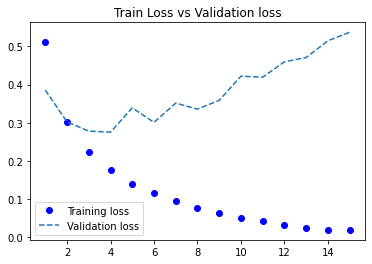

In [ ]:
epoch = range(1,len(acc)+1)
plt.plot( epoch, loss, "bo",label = "Training loss")
plt.plot(epoch , val_loss, "--",label = "Validation loss")
plt.title("Train Loss vs Validation loss")
plt.legend()
plt.show()

In [ ]:
history = network.fit(x_partial_train,
                      y_partial_train,
                      epochs=3,
                      batch_size=512,
                      validation_data = (x_val,y_val))

Epoch 1/3
30/30 [==============================] - 1s 47ms/step - loss: 0.0087 - accuracy: 0.9996 - val_loss: 0.5682 - val_accuracy: 0.8682
Epoch 2/3
30/30 [==============================] - 1s 48ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.5962 - val_accuracy: 0.8681
Epoch 3/3
30/30 [==============================] - 1s 41ms/step - loss: 0.0052 - accuracy: 0.9998 - val_loss: 0.6297 - val_accuracy: 0.8663


In [ ]:
results = network.evaluate(X_test,test_labels)

782/782 [==============================] - 1s 1ms/step - loss: 0.6853 - accuracy: 0.8527
